# **데이터분석 실무 100 3, 4장 실습**

# 실습1

In [2]:
#https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
# 쇼핑몰 고객 세분화 데이터: 슈퍼마켓 몰의 데이터로, 멤버십 카드를 통해 고객 ID, 나이, 성별, 연간 소득 및 지출 점수와 같은 고객에 대한 기본 데이터를 포함함

#필요한 라이브러리 불러오기
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta

import warnings
warnings.filterwarnings('ignore')

#파일 읽기
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 데이터 탐색 및 전처리 단계

In [3]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# 결측치 확인
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# 기초 통계량 확인
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# 컬럼 이름 변경
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

# K-means 클러스터링

In [7]:
# 클러스터링을 위한 특징 선택
X_clustering = df[['Age', 'Annual_Income', 'Spending_Score']]

# 데이터 표준화
sc = StandardScaler()
X_scaled = sc.fit_transform(X_clustering)

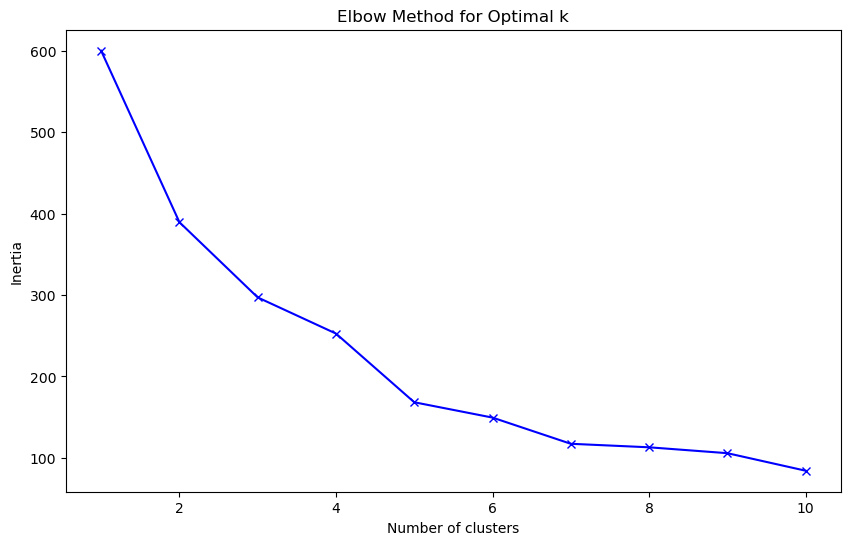

In [8]:
# 최적의 클러스터 수 찾기 (Elbow Method)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow Method 결과 시각화
plt.figure(figsize=(10,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [10]:
# 최적의 클러스터 수로 모델 학습 (k=5)
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# 원본 데이터에 클러스터 레이블 추가
df['Cluster'] = clusters

In [11]:
# 클러스터링 결과 확인
print(df['Cluster'].unique())
df.head()

[4 3 0 1 2]


,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


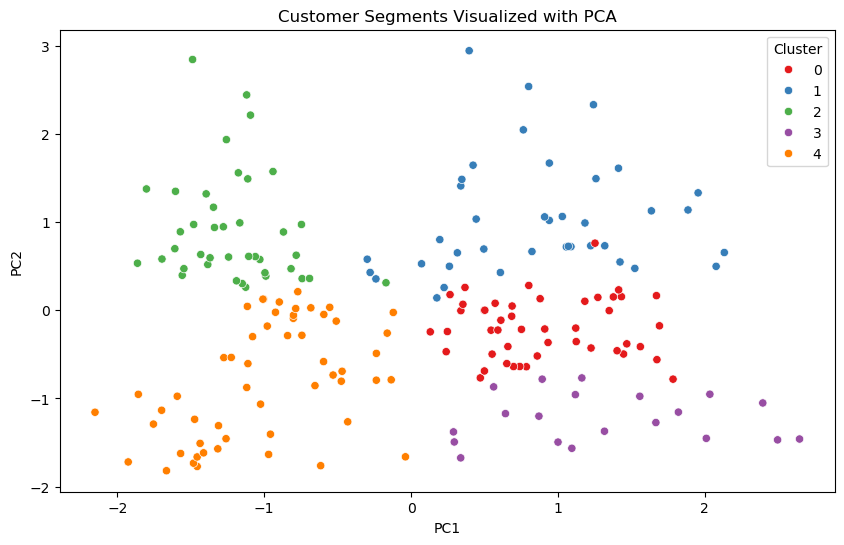

In [13]:
# 클러스터링 결과 시각화 (PCA 사용) - 2차원으로 축소
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Customer Segments Visualized with PCA')
plt.show()

# 실습 **2**

In [16]:
#https://archive.ics.uci.edu/dataset/502/online+retail+ii
#영국에 본사를 둔 온라인 소매업체의 전자상거래 트랜잭션 데이터로, 고객이 상품을 주문한 날짜, 시간, 국가 등의 정보를 포함

#excel 파일 읽기
df = pd.read_excel('online_retail_II.xlsx')

# 데이터 확인
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [17]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [18]:
# 결측치 확인
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [19]:
#열 이름 변경
df.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)

# 결측치 처리: Customer ID가 없는 행 제거
df = df.dropna(subset=['CustomerID'])

In [20]:
# 이상치 제거: Quantity와 UnitPrice가 음수인 데이터 제거
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

In [21]:
# InvoiceDate를 datetime 타입으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 연월 열 생성
df['YearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [22]:
# 월별 고객별 주문 수 계산
uselog_months = df.groupby(['YearMonth', 'CustomerID'], as_index=False)['Invoice'].count()
uselog_months.rename(columns={'Invoice': 'OrderCount'}, inplace=True)

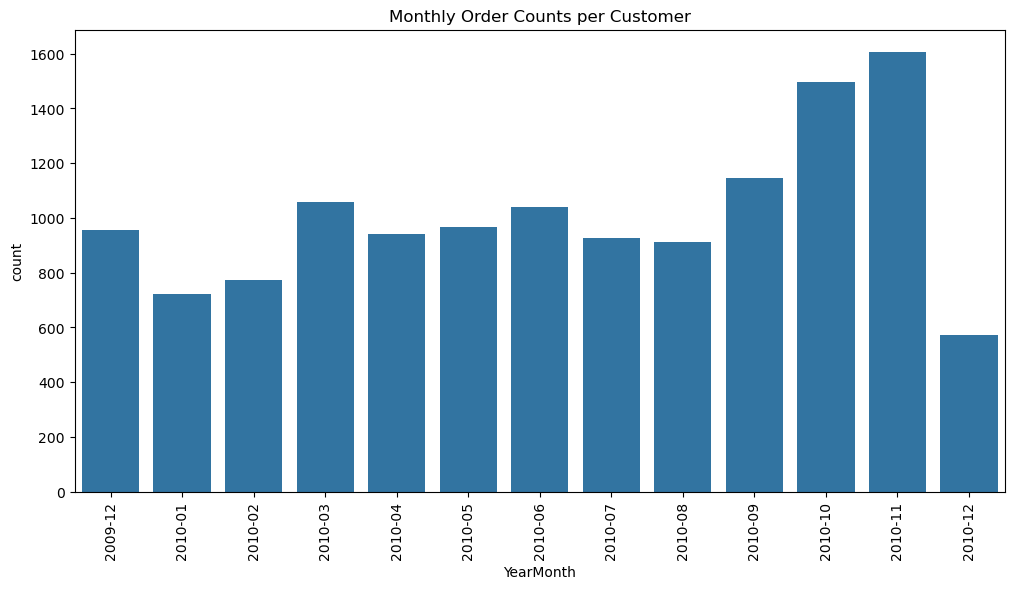

In [23]:
# 데이터 시각화: 월별 주문 수 분포 확인
plt.figure(figsize=(12, 6))
sns.countplot(x='YearMonth', data=uselog_months)
plt.xticks(rotation=90)
plt.title('Monthly Order Counts per Customer')
plt.show()

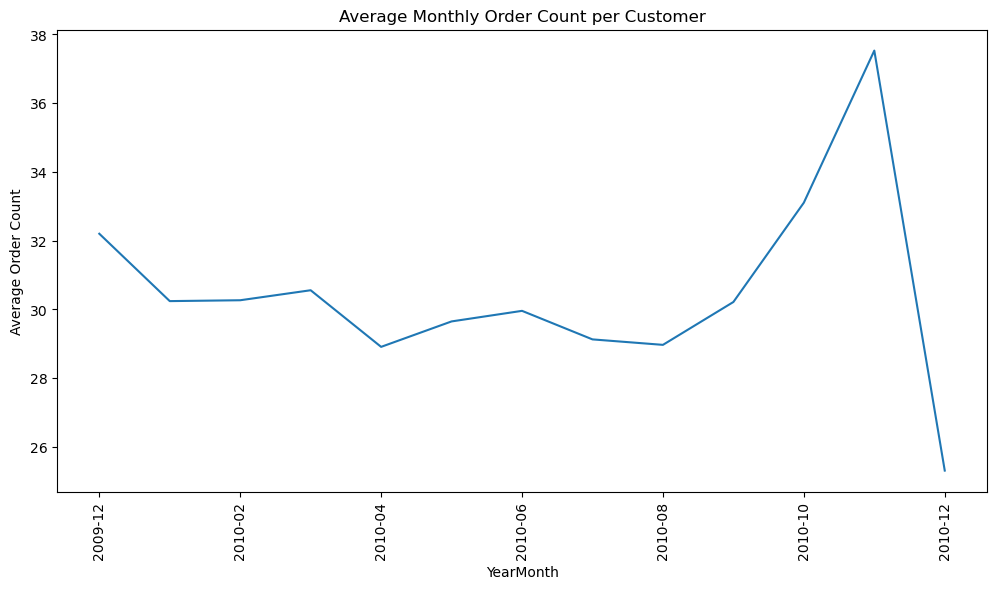

In [24]:
# 월별 고객 평균 주문 수 확인
uselog_months.groupby('YearMonth')['OrderCount'].mean().plot(figsize=(12, 6))
plt.title('Average Monthly Order Count per Customer')
plt.ylabel('Average Order Count')
plt.xticks(rotation=90)
plt.show()

In [25]:
# 예측 데이터 생성
year_months = list(uselog_months['YearMonth'].unique())
predict_data = pd.DataFrame()
for i in range(6, len(year_months)):
    tmp = uselog_months[uselog_months['YearMonth'] == year_months[i]].copy()
    tmp.rename(columns={'OrderCount': 'OrderCount_pred'}, inplace=True)
    for j in range(1, 7):
        tmp_before = uselog_months[uselog_months['YearMonth'] == year_months[i - j]]
        tmp_before.rename(columns={'OrderCount': f'OrderCount_{j-1}'}, inplace=True)
        tmp = pd.merge(tmp, tmp_before[['CustomerID', f'OrderCount_{j-1}']], on='CustomerID', how='left')

    #과거 6개월 데이터를 포함하는 tmp를 데이터프레임 predict_data에 누적
    predict_data = pd.concat([predict_data, tmp], ignore_index=True)

In [26]:
# 결측치 제거
predict_data = predict_data.dropna()
predict_data = predict_data.reset_index(drop=True)

# 특징이 되는 변수 추가


In [27]:
# 예측을 위한 기간 추가
predict_data['now_date'] = pd.to_datetime(predict_data['YearMonth'], format='%Y-%m')
predict_data['start_date'] = pd.to_datetime('2011-01-01')  # 가상의 시작일
predict_data['period'] = predict_data.apply(lambda row: relativedelta(row['now_date'], row['start_date']).years * 12 + relativedelta(row['now_date'], row['start_date']).months, axis=1)

In [28]:
predict_data.head()

,YearMonth,CustomerID,OrderCount_pred,OrderCount_0,OrderCount_1,OrderCount_2,OrderCount_3,OrderCount_4,OrderCount_5,now_date,start_date,period
0,2010-06,12471.0,52,29.0,63.0,55.0,38.0,51.0,120.0,2010-06-01,2011-01-01,-7
1,2010-06,12540.0,22,43.0,8.0,33.0,20.0,28.0,7.0,2010-06-01,2011-01-01,-7
2,2010-06,12681.0,110,47.0,63.0,35.0,61.0,51.0,46.0,2010-06-01,2011-01-01,-7
3,2010-06,12682.0,69,33.0,33.0,23.0,68.0,33.0,44.0,2010-06-01,2011-01-01,-7
4,2010-06,12748.0,77,142.0,21.0,191.0,303.0,39.0,86.0,2010-06-01,2011-01-01,-7


# 선형회귀 모델 사용

In [29]:
# 독립 변수(X)와 종속 변수(y) 정의
X = predict_data[["OrderCount_0", "OrderCount_1", "OrderCount_2", "OrderCount_3", "OrderCount_4", "OrderCount_5", "period"]]
y = predict_data["OrderCount_pred"]

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# 모델 성능 확인
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.673054368179357
0.5066126476780441


In [33]:
# 회귀 계수 확인
coef = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coef)

        Feature  Coefficient
0  OrderCount_0     0.483399
1  OrderCount_1    -0.006055
2  OrderCount_2     0.142895
3  OrderCount_3     0.353470
4  OrderCount_4     0.035677
5  OrderCount_5    -0.092145
6        period     0.270386


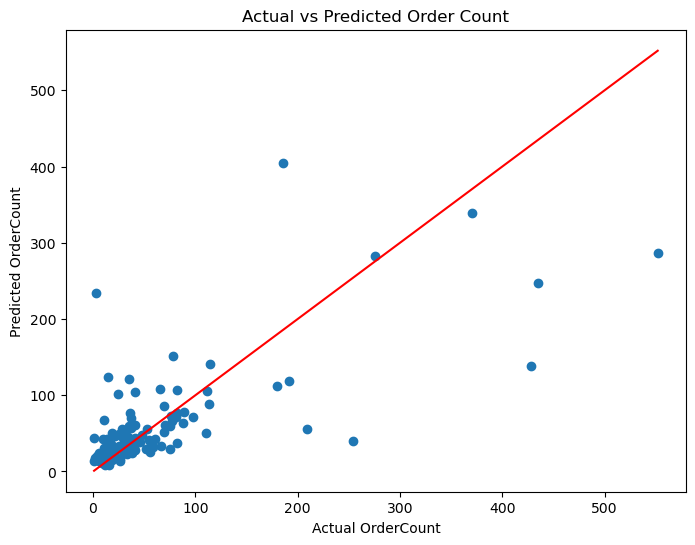

In [34]:
# 예측 결과 시각화
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual OrderCount')
plt.ylabel('Predicted OrderCount')
plt.title('Actual vs Predicted Order Count')
plt.show()